<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/gsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gravity Search Algorithm

In [0]:
from random import random as rnd
import matplotlib.pyplot as plt


## Funkce pro vytvoření jedince

In [0]:
def createMember():
  result = {}
  result['position'] = {'x': rnd() * 10 - 5, 'y': rnd() * 10 - 5}
  result['velocity'] = {'x': 0, 'y': 0}
  result['force'] = {'x': 0, 'y': 0}
  result['mass'] = 1
  return result

## Funkce pro vyhodnocení jedince
Definuje kriteriální funkci. Implementované algoritmy optimalizují na maximum.

In [0]:
def evaluate(member):
  return -(member['position']['x'] * member['position']['x'] + member['position']['y'] * member['position']['y'])

## Zobrazení soustavy

In [0]:
def plotSystem(system, title):
  x = []
  y = []
  for member in system:
    x.append(member['position']['x'])
    y.append(member['position']['y'])

  plt.plot(x, y, 'ko', ms=3)
  plt.title(title)
  plt.show()

In [0]:
def calculateMass(system, f):
  for member in system:
    member['value'] = f(member)
  
  minimum = system[0]['value']
  maximum = minimum
  sumation = 0

  for member in system:
    cValue = member['value']
    sumation = sumation + cValue
    if cValue < minimum:
      minimum = cValue
    if cValue > maximum:
      maximum = cValue

  func = lambda cValue: (cValue - minimum) / (maximum - minimum)
  if maximum > minimum:
    func = lambda cValue: 1

  for member in system:
    cValue = member['value']
    member['mass'] = func(cValue)
  


In [0]:
from math import sqrt
def calculateForce(memberA, memberB, g):
  result = {'x': 0, 'y': 0}
  distance = {
      'x': memberB['position']['x'] - memberA['position']['x'],
      'y': memberB['position']['y'] - memberA['position']['y']
              }
  distanceAbs = sqrt(distance['x'] * distance['x'] + distance['y'] * distance['x'])
  # F = g * MA * MB / (d * d)
  F = g * memberA['mass'] * memberB['mass'] / (distanceAbs * distanceAbs)
  result['x'] = F * distance['x'] / distanceAbs
  result['y'] = F * distance['y'] / distanceAbs
  return result

def calculateForces(system, g):
  for member in system:
    member['force'] = {'x': 0, 'y': 0}

  for memberA in system:
    sumForce = {'x': 0, 'y': 0}
    for memberB in system:
      if memberA == memberB:
        continue
      currentForce = calculateForce(memberA, memberB, g)
      sumForce['x'] = sumForce['x'] + currentForce['x']
      sumForce['y'] = sumForce['y'] + currentForce['y']
    memberA['force'] = sumForce
  return system

def calculateAccelerations(system):
  for member in system:
    # F = m * a
    force = member['force']
    mass = member['mass']
    member['acceleration'] = {'x': force['x'] / mass, 'y': force['y'] / mass }
  return system

def calculateVelocities(system, dt):
  for member in system:
    acceleration = member['acceleration']
    velocity = member['velocity']
    member['velocity'] = {
        'x': velocity['x'] + dt * acceleration['x'],
        'y': velocity['y'] + dt * acceleration['y']}
  return system

def calculatePositions(system, dt):
  for member in system:
    position = member['position']
    velocity = member['velocity']
    member['position'] = {
        'x': position['x'] + dt * velocity['x'],
        'y': position['y'] + dt * velocity['y']}
  return system


## Simulace

In [0]:
def simulationStep(system, dt, g):
  calculatePositions(system, dt)
  calculateMass(system, f = evaluate)
  calculateForces(system, g = g)
  calculateAccelerations(system, dt)
  calculateVelocities(system, dt)

In [0]:
def createSystem(count, createFunc):
  result = [] 
  for i in range(count):
    member = createFunc()
    result.append(member)
  return result
                 

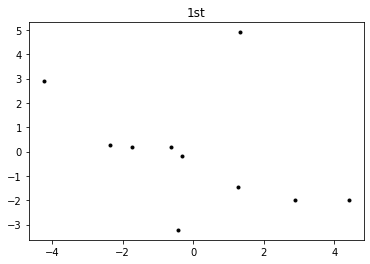

ValueError: ignored

In [62]:
system = createSystem(10, createMember)
plotSystem(system, title='1st')

simulationStep(system, dt=1, g = 9.81)
plotSystem(system, title='2nd')